#### Neural Networks

In [1]:
#imports

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

#### Dataset

We will be using the MNIST fashion dataset from Keras

It contains 70k images:
- 60k for training
- 10k for testing

In [2]:
#load in the dataset, then split into train/test
fashion = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion.load_data()

In [3]:
# Look at shape of data

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


This shows we have 70k images in totalm are they are 28 by 28 pixels

In [4]:
print(train_images[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

The pixels seem to be between 0 and 255 which would suggest a greyscale

0 equates to a black pixel, whilst 1 equates to a white pixel and anything inbetween is grey

This means there are no colour channels

Next we will look at the labels for the images:

In [5]:
train_labels[:15]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7], dtype=uint8)

We have labels between 0 and 9, which corrsepond to different items of clothing

Using the datasets documentation we can map the number to it's label by cretaing an array of label names:

In [6]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 
               'Ankle boot']

Using matplotlib, we can take a look at what one of the images looks like

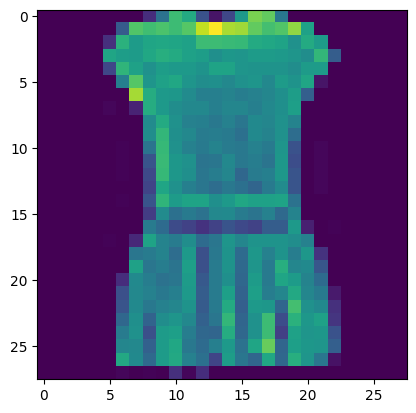

In [7]:
plt.figure()
plt.imshow(train_images[3])
plt.show()

The third image looks like a dress!

#### Preprocessing

Neural networks work faster with smaller values, so if we normalise the pixels to be between 0 and 1 rather than between 0 and 255, we should be bale to get a more efficent model

A neural network will start with biases and weights that are alrady inbetween 0 and 1 so making our values close to this will help

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

#### Building the model

We will use a sequential mode, which is just the most basic of NN's, information goes from left to right sequentially

It is as simple as defining layers in network within the sequential function

In [9]:


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer is in the same shape as our image
                                                    #flatten will turn the 28x28 image into an array of length 784 (flattening the matrix)

    keras.layers.Dense(128, activation = 'relu'),  #First hidden layer, dense means fully connected, we picked 128 randomly, find through experimenting
                                                    #relu makes all numbers below 0 equal to 0

    keras.layers.Dense(10, activation = 'softmax')  #output layer has 10 neurons, one for each class 0-9
                                                    #softmax ensures all our ouputs combined add up to 1
])

c:\Users\sinea\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile the model

This is where we choose the optimiser (the function that will perform gradient descent)

loss function (how we calculate how good/bad the ouput is compared to the actual class) 

and metric we will use to evaulate (things like accuracy, precision, recall etc)

To choose the most appropriate ones, go to Keras documentation and see what they recommend, and experiment a bit!

In [11]:
model.compile(optimizer= 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#changing these to get best results is hyperparameter tuning

#### Training the model

In [12]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7891 - loss: 0.6162
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8622 - loss: 0.3834
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8765 - loss: 0.3460
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8830 - loss: 0.3146
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8893 - loss: 0.2950
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8959 - loss: 0.2805
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9014 - loss: 0.2685
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9049 - loss: 0.2561
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9055 - loss: 0.2465
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9102 - loss: 0.2375


#### Testing the model

Above we see we got a final accuracy of 91%, but this isn't the true accuracy as we haven't used the model on unseen data

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test Accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.8821 - loss: 0.3428
Test Accuracy: 0.8823999762535095


We got an accuracy of 88% on unseen data, which is a good starting point to improve on

We have a lower accuracy than on the training data as we have some overfitting, we can adjust this with hyperparamer tuning

Let's try with a lower epoch:

In [20]:
model.fit(train_images, train_labels, epochs=2)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test Accuracy:', test_acc)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9262 - loss: 0.1966
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9271 - loss: 0.1921
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.8857 - loss: 0.3525
Test Accuracy: 0.886900007724762


We only imrpvoed by about 0.4% but it is something!

Generally a lower epoch will be better as the data will be seen less and the model won't tune to specific images as much

#### Making predictions

Neural networks work better at making many predictions at once rather than just one, so usuually you would want to predict with an array

In [15]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


Let's look at the predictions on the first image

In [16]:
predictions[0]

array([8.4482528e-09, 8.0702589e-12, 8.3643361e-12, 1.8321981e-11,
       9.0247315e-10, 1.7849190e-04, 8.0890928e-08, 1.5342067e-02,
       8.6642954e-10, 9.8447925e-01], dtype=float32)

This would predict the 9th class as this has the highest probability in the distribution

<function matplotlib.pyplot.show(close=None, block=None)>

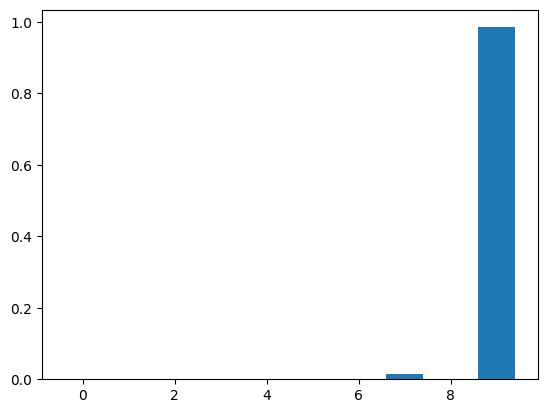

In [17]:
plt.figure()
plt.bar(np.arange(len(predictions[0])), predictions[0])
plt.show

The chart above shows that the 9th class dominates the prediction

Ankle boot


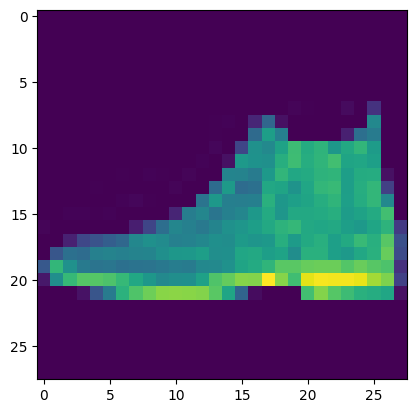

In [18]:
print(label_names[np.argmax(predictions[0])])

plt.figure()
plt.imshow(test_images[0])
plt.show()

#### Verifying predictions

Try again
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


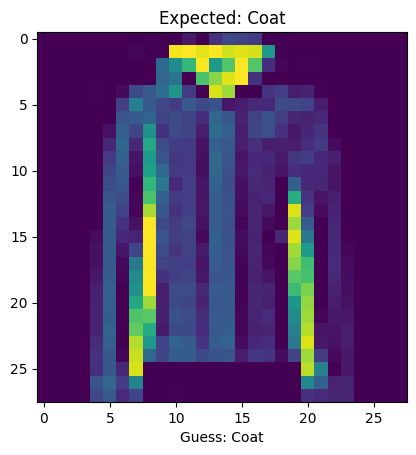

In [19]:
def predict(model, image, correct_label):
    label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 
               'Ankle boot']
    
    prediction = model.predict(np.array([image]))
    predicted_class = label_names[np.argmax(prediction)]

    show_image(image, label_names[correct_label], predicted_class)


def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img)
    plt.title('Expected: ' + label)
    plt.xlabel('Guess: ' + guess)
    plt.show()


def get_number():
    while True:
        num = input('Pick a number: ')
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
        else:
            print('Try again')


num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)